# CSC 380 Final Project

## 1)

I have read and understand the rules of the competition.

## 2)
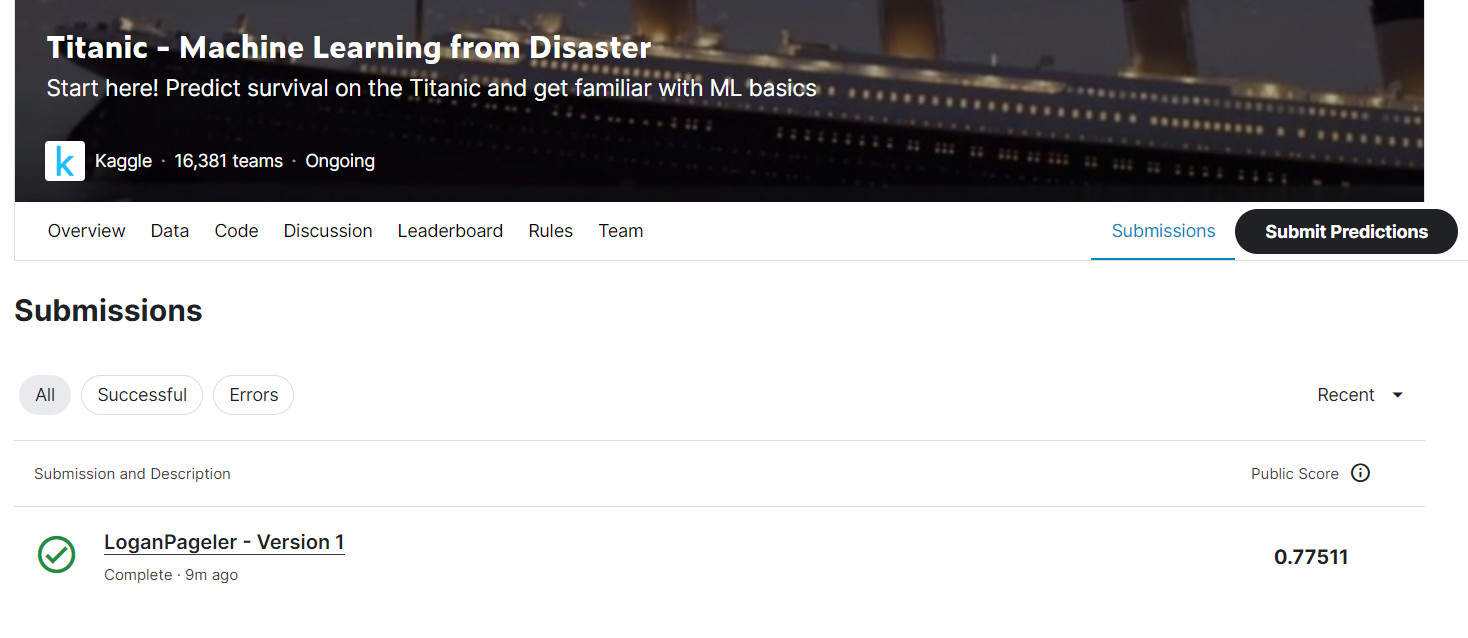

### 3)
```
# Dummy Submission:

import pandas as pd
train_data = pd.read_csv("/kaggle/input/nbme-score-clinical-patient-notes/train.csv")
test_data = pd.read_csv("/kaggle/input/nbme-score-clinical-patient-notes/test.csv")

predictions = []
for id in test_data.id:
        predictions.append('0 0')

output = pd.DataFrame({'id': test_data.id, 'location': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")
```


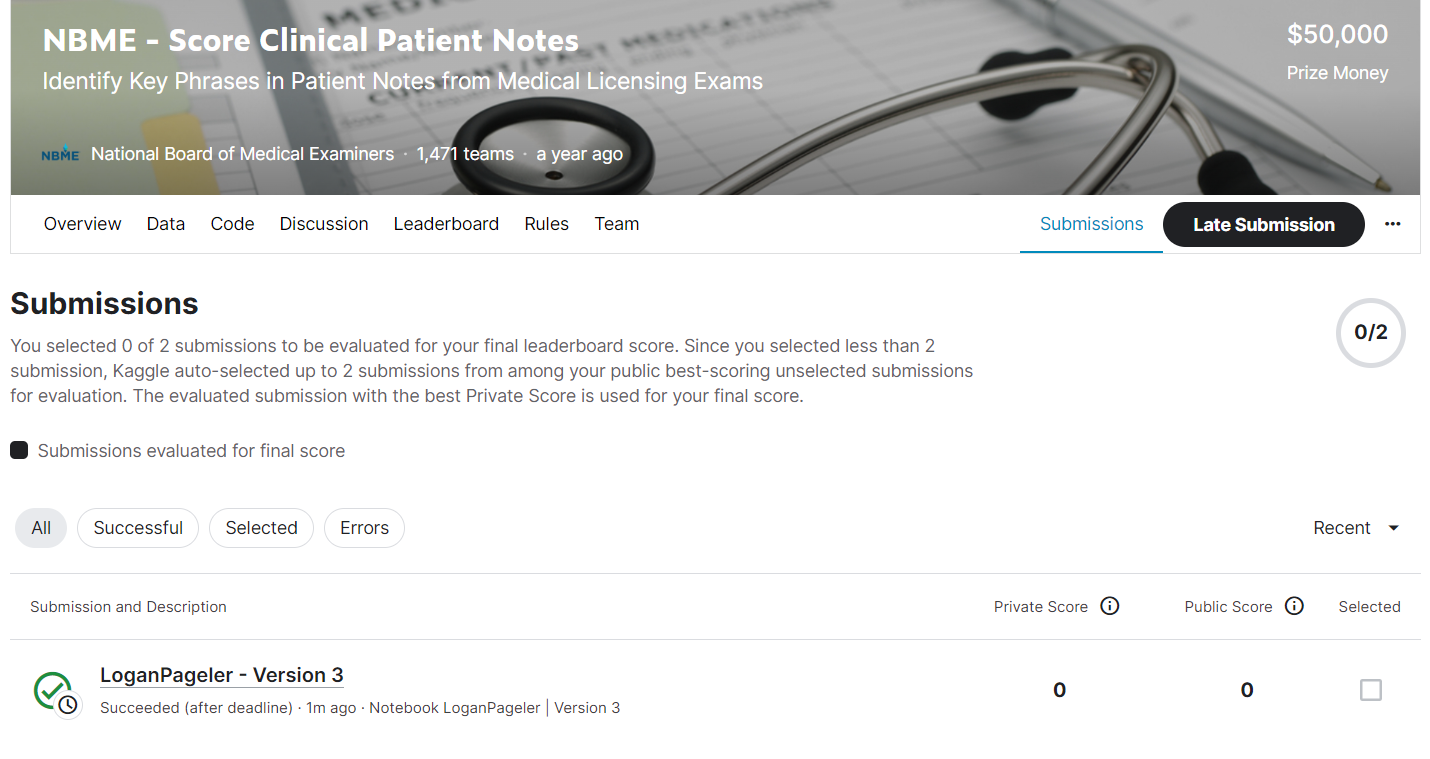

## 4)

### a)

C:\Users\pagel\AppData\Local\Temp\ipykernel_2348\339344350.py:8: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  annotations = train_data['annotation'].apply(pd.Series).stack().reset_index(drop=True)


There are 12234 annotations.


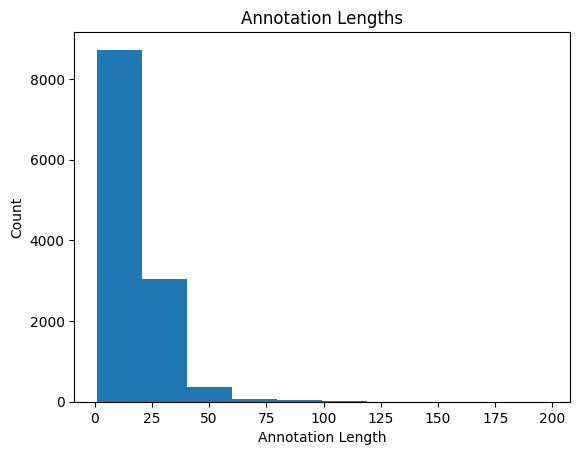

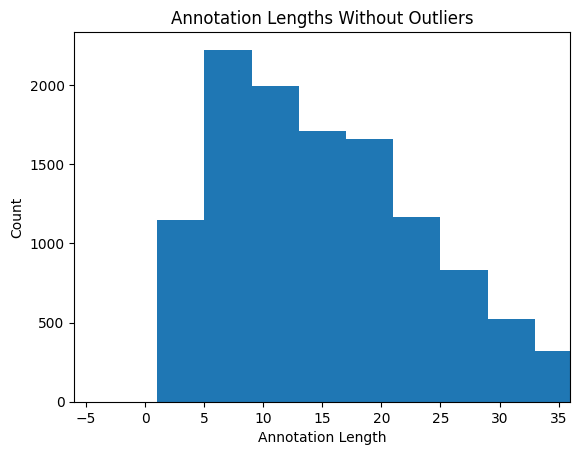

Top 5 Longest:
Her periods no occur anywhere from 3 weeks to 4 months, 2-6 days of bleeding, and her periods are heavy or light
2 wks ago went to ED due to palpitations and numbness in fingers, had nl ECG, CBC, metabolic panel and cardiac enzymes
one episode of auditory hallucinations at night when she thought she heard a party going on only to discover there was not one
2 weeks ago went to the emergency department. At that time CBC, metabolic panel, cardiac enzymes and ECG were within normal limits
visited the ER most recently 2 weeks ago for symptoms and was worked up for cardiac chest pain with normal ECG, troponins, BMP, and CBC


In [25]:
import pandas as pd
import ast
import matplotlib.pyplot as plt
import numpy as np

train_data  = pd.read_csv("data/train.csv")
train_data['annotation']= train_data['annotation'].apply(ast.literal_eval)
annotations = train_data['annotation'].apply(pd.Series).stack().reset_index(drop=True)
print(f"There are {len(annotations)} annotations.")
annotation_lengths = annotations.apply(len)
plt.hist(annotation_lengths)
plt.title("Annotation Lengths")
plt.xlabel("Annotation Length")
plt.ylabel("Count")
plt.show()

median = annotation_lengths.median()
iqr = np.quantile(annotation_lengths, 0.75) - np.quantile(annotation_lengths, 0.25)
plt.hist(annotation_lengths, bins=range(min(annotation_lengths), max(annotation_lengths) + 4, 4))
plt.title("Annotation Lengths Without Outliers")
plt.xlabel("Annotation Length")
plt.ylabel("Count")
plt.xlim(median - 1.5 * iqr, median + 1.5 * iqr)
plt.show()

annotation_lengths = annotation_lengths.sort_values()
longest = annotation_lengths[-6:-1]
print(f"Top 5 Longest:")
for i in longest.keys():
    print(annotations[i])


### b)

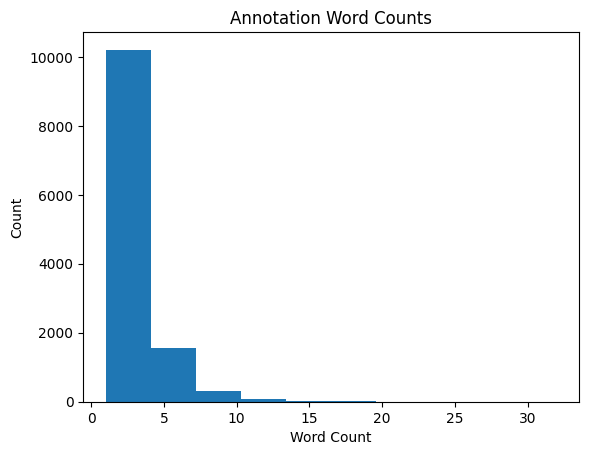

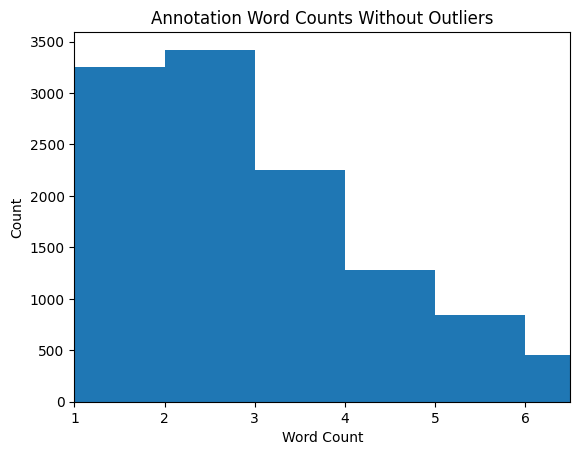

Top 5 Longest:
2 weeks ago went to the emergency department. At that time CBC, metabolic panel, cardiac enzymes and ECG were within normal limits
2 wks ago went to ED due to palpitations and numbness in fingers, had nl ECG, CBC, metabolic panel and cardiac enzymes
5 years ago she had 2-3 episodes in a month. 3 weeks ago she had an episode every day for a week
one episode of auditory hallucinations at night when she thought she heard a party going on only to discover there was not one
visited the ER most recently 2 weeks ago for symptoms and was worked up for cardiac chest pain with normal ECG, troponins, BMP, and CBC


In [30]:
annotation_lengths = annotations.str.split().apply(len)
plt.hist(annotation_lengths)
plt.title("Annotation Word Counts")
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.show()

median = annotation_lengths.median()
iqr = np.quantile(annotation_lengths, 0.75) - np.quantile(annotation_lengths, 0.25)
plt.hist(annotation_lengths, bins=range(min(annotation_lengths), max(annotation_lengths) + 1, 1))
plt.title("Annotation Word Counts Without Outliers")
plt.xlabel("Word Count")
plt.ylabel("Count")
plt.xlim(max(median - 1.5 * iqr, 1), median + 1.5 * iqr)
plt.show()

annotation_lengths = annotation_lengths.sort_values()
longest = annotation_lengths[-6:-1]
print(f"Top 5 Longest:")
for i in longest.keys():
    print(annotations[i])

### c)

In [87]:
from IPython.display import display

patient_notes = pd.read_csv('data/patient_notes.csv')
note_lengths = patient_notes.copy()
note_lengths['pn_history'] = note_lengths['pn_history'].apply(len)
note_lengths= note_lengths.drop('pn_num',axis=1)
note_lengths = note_lengths.groupby(['case_num'])['pn_history'].sum()




table = train_data.copy()
table = table.drop(['id','pn_num', 'location'], axis=1)
table['annotation'] = [sum([len(s) for s in anno]) for anno in table['annotation']]
table['annotation'] = table.apply(lambda row : row['annotation'] / note_lengths[row['case_num']], axis=1)
table['feature_num'] = table.apply(lambda row: row['feature_num'] % 100, axis=1)
display(table.pivot_table(values='annotation', index='case_num', columns='feature_num', aggfunc='sum'))
table.groupby('case_num')['annotation'].sum()



feature_num,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0,10.0,11.0,12.0,13.0,14.0,15.0,16.0,17.0
case_num,,,,,,,,,,,,,,,,,,
0,0.000799,0.001128,0.000630,0.000870,0.000412,0.000601,0.000609,0.000347,0.000292,0.001284,0.000856,0.000308,0.000109,NaN,NaN,NaN,NaN,NaN
1,0.000763,0.001221,0.004500,0.003177,0.000873,0.002180,0.003767,0.003008,0.001821,0.001822,0.002536,0.003172,0.000437,NaN,NaN,NaN,NaN,NaN
2,0.002622,0.000340,0.000142,0.000833,0.000768,0.002150,0.000672,0.000354,0.000201,0.000010,0.000738,0.000576,0.003582,0.001104,0.000740,0.000242,0.000275,NaN
3,0.000285,0.000252,0.000181,0.000109,0.000111,0.000133,0.000247,0.000178,0.000035,0.000186,0.000125,0.000082,0.000094,0.000388,0.000073,0.000080,NaN,NaN
4,0.001051,0.000534,0.000643,0.000168,0.000529,0.000244,0.000487,0.000067,0.000340,0.000141,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,0.000332,0.000074,0.000081,0.000385,0.000451,0.000791,0.000113,0.000242,0.000252,0.000675,0.000273,0.000157,0.000295,0.000235,0.000279,0.000096,0.000504,0.000091
6,0.000715,0.000193,0.000481,0.001612,0.002172,0.001806,0.001031,0.001127,0.000618,0.000518,0.001590,0.000566,NaN,NaN,NaN,NaN,NaN,NaN
7,0.000080,0.000387,0.001908,0.000293,0.000403,0.000093,0.000637,0.000183,0.000302,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,0.000369,0.000761,0.000097,0.000715,0.000112,0.000171,0.000591,0.000022,0.000378,0.000059,0.000479,0.000394,0.000333,0.000648,0.000359,0.000317,0.000451,0.001208


case_num
0    0.008245
1    0.029277
2    0.015348
3    0.002559
4    0.004203
5    0.005328
6    0.012429
7    0.004286
8    0.007464
9    0.003897
Name: annotation, dtype: float64

## 5)

In [166]:
def random_predict(case_num, feature_num, pn_history):
    length = len(pn_history)
    pred = np.array([False]* length, dtype=bool)
    percent = table.loc[(table['case_num']==case_num) & (table['feature_num'] == feature_num)]['annotation'].sum()
    start = np.random.randint(0, length - int(percent*length*10))
    for i in range(start, start+int(length*percent*10)):
        pred[i] = True
    
    return pred


In [157]:
def convert_range(location, pn_history):
    actual = np.array([False]*len(pn_history), dtype=bool)

    
        
    for ran in location:
        for r in ran.split(";"):
            r = r.split()
            for i in range(int(r[0]), int(r[1])):
                actual[i]=True

    return actual


In [158]:
def calc_scores(pred, actual):
   
    tp = np.count_nonzero((pred & actual) == True)
    fp = np.count_nonzero((pred & ~actual) == True)
    fn = np.count_nonzero((~pred & actual) == True)

    return tp, fp, fn

In [154]:
# Quick Test
test_note = patient_notes.loc[(patient_notes['case_num'] == 0) & (patient_notes['pn_num'] == 82)]["pn_history"][79]
location = train_data.loc[(train_data['case_num'] == 0) & (train_data['pn_num'] == 82) * (train_data['feature_num'] == 9)]['location'][48]
print(location[0])
calc_scores(random_predict(0, 9, test_note), convert_range(location, test_note))


85 99
test


(0, 1, 34)

In [167]:
all_tp = 0
all_fp = 0
all_fn = 0

for i, row in train_data.iterrows():
    pn_history = patient_notes.loc[(patient_notes['case_num'] == row['case_num']) & (patient_notes['pn_num'] == row['pn_num'])]["pn_history"].iloc[0]

    tp, fp, fn = calc_scores(random_predict(row['case_num'], row['feature_num'] % 100, pn_history), convert_range(row['location'], pn_history))
    all_tp += tp
    all_fp += fp
    all_fn += fn

print(f"True Positives: {all_tp}")
print(f"False Positives: {all_fp}")
print(f"False Negatives: {all_fn}")

print(f"F1 Score: {all_tp / (all_tp + 0.5 * (all_fp + all_fn))}")

True Positives: 1835
False Positives: 66926
False Negatives: 190434
F1 Score: 0.014059686626058308


## 6)
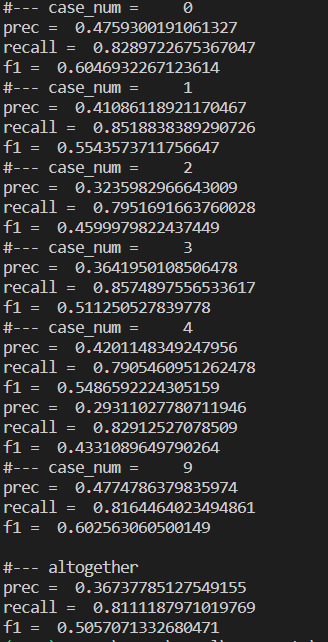
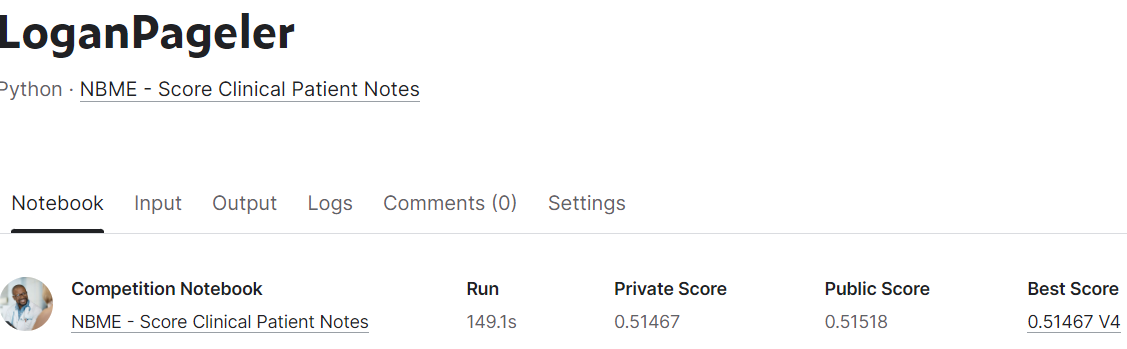


## 7)
Random Forest:

ccp_alpha = 0.1 :

 Crashed :(


ccp_alpha = 0.01 :

 Crashed as well :(


ccp_alpha = 0.001 :

prec =  0.9222728491021174

recall =  0.035793601672656536

f1 =  0.06891268756477462


ccp_alpha = 0.0001 :

prec =  0.8251838020772552

recall =  0.5516489917771455

f1 =  0.6612448722584506


ccp_alpha = 0.00001 :

prec =  0.7353094283002113

recall =  0.749356370501745

f1 =  0.7422664478852994


SVM:

Gamma = 1:

prec =  0.8359900002293525

recall =  0.3791562862447925

f1 =  0.5216999259314921

Gamma = 10:

prec = 0.783427924513398

recall = 0.6439935715065871

f1 = 0.70690587466345

Gamma = 100:

I assume this would be better, but it took over 20 mins and it didn't even
complete case 1. So instead I tested linear SVC. Also the Gamma = 10 took 5 hours,
so I am going to try LinearSVC instead.

LinearSVC:

prec = 0.7612107623318386

recall = 0.05297265809880948

f1 = 0.0990522867137697


So the best performing model was The Random Forests with a ccp_alpha of $10^{-5}$ with an f1 score of f1 =  0.7422664478852994

## 8)

### a)

```
def calc_char_bigrams(text):
    ### TODO insert code here.
    text = re.sub(r"[!,\.:;?]", " ", text)

    words = text.split()

    bigrams=[]

    for word in words:
        bigrams.append(word[0])
        for i in range(0, len(word) -1):
            bigrams.append(word[i:i+2])
        bigrams.append(word[-1])
    
    return bigrams
```

Result of bigram_test.py:

Test 1: 'word'

Expected: ['w', 'wo', 'or', 'rd', 'd']

Got: ['w', 'wo', 'or', 'rd', 'd']

Test 2: 'a b c'

Expected: ['a', 'a', 'b', 'b', 'c', 'c']

Got: ['a', 'a', 'b', 'b', 'c', 'c']

Test 3: 'Hi!     How are you?'

Expected: ['H', 'Hi', 'i', 'H', 'Ho', 'ow', 'w', 'a', 'ar', 're', 'e', 'y', 'yo', 'ou', 'u']

Got: ['H', 'Hi', 'i', 'H', 'Ho', 'ow', 'w', 'a', 'ar', 're', 'e', 'y', 'yo', 'ou', 'u']

Test 4: 'THIS    @is A.weird!!&TEST       String'

Expected: ['T', 'TH', 'HI', 'IS', 'S', 'i', 'is', 's', 'A', 'A', 'w', 'we', 'ei', 'ir', 'rd', 'd', 'T', 'TE', 'ES', 'ST', 'T', 'S', 'St', 'tr', 'ri', 'in', 'ng', 'g']

Got: ['T', 'TH', 'HI', 'IS', 'S', 'i', 'is', 's', 'A', 'A', 'w', 'we', 'ei', 'ir', 'rd', 'd', 'T', 'TE', 'ES', 'ST', 'T', 'S', 'St', 'tr', 'ri', 'in', 'ng', 'g']

### b)

Bigram Cutoff Performances:

Cutoff = 30:

prec =  0.36737785127549155

recall =  0.8111187971019769

f1 =  0.5057071332680471

### c)
Unique bigrams:

cutoff = 7:

971 Unique Bigrams

cutoff = 15:

825 Unique Bigrams

cutoff = 30:

718 Unique Bigrams

cutoff = 60:

579 Unique Bigrams

cutoff = 120:

462 Unique Bigrams

### d)

Bigram Cutoff Performances:

Cutoff = 7:

prec =  0.36737785127549155

recall =  0.8111187971019769

f1 =  0.5057071332680471

Cutoff = 15:

prec =  0.4875169045134279

recall =  0.8212244303553875

f1 =  0.6118257008177903

Cutoff = 30:

prec =  0.36737785127549155

recall =  0.8111187971019769

f1 =  0.5057071332680471

Cutoff = 60:

prec =  0.4875169045134279

recall =  0.8212244303553875

f1 =  0.6118257008177903

Cutoff = 120:

prec =  0.49040604378891434

recall =  0.8217653391862443

f1 =  0.6142470322732388

## 9)

The decision tree with ccp_alpha = $10^{-5}$ had the highest f1 score

Its worse case was case 5 with an f1 score of f1 =  0.67065458280031

In [173]:

from mylib import *

from sklearn.model_selection import KFold
from sklearn.ensemble import RandomForestClassifier

opt = SimpleNamespace()
opt.prefix = "./data/"
printExpr('opt')

#print("Loading data... ", end='')
tic()
df_efeatures = pd.read_csv(opt.prefix+"features.csv")
df_pnotes    = pd.read_csv(opt.prefix+"patient_notes.csv")
df_train     = pd.read_csv(opt.prefix+"train.csv")
df_test      = pd.read_csv(opt.prefix+"test.csv") 
dataw = DataWrapper(df_efeatures, df_pnotes, df_train, df_test)
#print("Done (%.2fs)"% toc())

n_efeatures_list = [len(df_efeatures[df_efeatures.case_num == i]) for i in range(10)]
printExpr("n_efeatures_list")

# FIXME choose the processed data
out = LoadPickle('pdata_v01.pkl')
pdata = out.pdata
dataopt = out.dataopt
#opt = out.opt
ra.seed(29)

n_folds = 5
kf = KFold(n_folds, shuffle=True, random_state=ra)

n_cases = 10
all_tp = 0
all_fp = 0
all_fn = 0
tps = np.zeros(n_cases)
fps = np.zeros(n_cases)
fns = np.zeros(n_cases)

case_num = 5
mypdata = pdata[5]


print('#--- case_num = %5d' % case_num)

my_efeatures = np.unique(df_efeatures[df_efeatures.case_num == case_num].feature_num)
n_efeatures = len(my_efeatures)

my_pn_nums = np.unique(mypdata.pn_num)
pairs = [(a,b) for a,b in kf.split(my_pn_nums)]

all_predY = mypdata.label.copy()
all_predY[:] = np.nan



for train_idxs, val_idxs in pairs:
    train = mypdata[mypdata.pn_num.isin(my_pn_nums[train_idxs])]
    val = mypdata[mypdata.pn_num.isin(my_pn_nums[val_idxs])]

    trainX = train.iloc[:,3:-1]
    trainY = train.iloc[:,-1]

    valX = val.iloc[:,3:-1]
    valY = val.iloc[:,-1]

    # FIXME you can choose your classifier here.
    clf = RandomForestClassifier(ccp_alpha=1e-5)

    clf = clf.fit(trainX, trainY)
    predY = clf.predict(valX)

    all_predY[val.index] = predY
assert ~np.any(np.isnan(all_predY))
all_predY = all_predY.astype(int)




#--- compute tp, fp, fn
Y = mypdata.label

n_efeatures = n_efeatures_list[case_num]
all_fps = []
all_fns = []
corr_pn_num= []

for (i_pn_num, pn_num) in enumerate(my_pn_nums):
    pn_history = df_pnotes[df_pnotes.pn_num == pn_num].pn_history.values[0]

    # extract ground truth for each feature
    true_mat = dataw.get_ground_truth(case_num, pn_num)

    #- need to extract the location, still...
    pred_mat = true_mat.copy()
    pred_mat[:,:] = False

    my_index = mypdata[mypdata.pn_num == pn_num].index
    for idx in my_index:
        pred = all_predY[idx]
        if (pred != -1):
            from_ = mypdata.loc[idx,'loc_from']
            to_ = mypdata.loc[idx,'loc_to']
            
            pred_mat[pred, from_:to_] = True

    note_fp = 0
    note_fn = 0
    for efeature in range(n_efeatures):
        note_fp += (~true_mat[efeature,:] & pred_mat[efeature,:]).sum() 
        note_fn += (true_mat[efeature,:] & ~pred_mat[efeature,:]).sum() 
        
        
        pass
    pass

    all_fps.append(note_fp)
    all_fns.append(note_fn)
    corr_pn_num.append(pn_num)

all_fps = np.array(all_fps, dtype=int)
all_fns = np.array(all_fns, dtype=int)
corr_pn_num=np.array(corr_pn_num, dtype=int)

highest_fn_pn = corr_pn_num[np.argpartition(all_fns, 10)[-10:]]
highest_fp_pn = corr_pn_num[np.argpartition(all_fps, 10)[-10:]]

print("Pn_num for notes with highest false positives:")
print(highest_fp_pn)

print("Pn_num for notes with highest false negatives:")
print(highest_fn_pn)

opt =  namespace(prefix='./data/')
n_efeatures_list =  [13, 13, 17, 16, 10, 18, 12, 9, 18, 17]
#--- case_num =     5
Pn_num for notes with highest false positives:
[50877 50574 50571 56517 56522 50541 50375 56697 56841 53527]
Pn_num for notes with highest false negatives:
[50615 56372 50607 56517 50571 56535 50541 50535 56841 57026]


In [179]:
#Tester to understand what predictions the model is making
true_mat = dataw.get_ground_truth(case_num, pn_num)

#- need to extract the location, still...
pred_mat = true_mat.copy()
pred_mat[:,:] = False

mins = np.array([10000] * 18, dtype = int)
maxes = np.array([0] * 18, dtype = int)
my_index = mypdata[mypdata.pn_num == 50877].index
for idx in my_index:
    pred = all_predY[idx]
    if (pred != -1):
        mins[pred] = min(mins[pred], mypdata.loc[idx,'loc_from'])
        maxes[pred] = max(maxes[pred], mypdata.loc[idx,'loc_to'])

for n in range(18):
    print(f"{n:} {mins[n]}-{maxes[n]}")

0 315-327
1 29-32
2 10000-0
3 569-572
4 186-447
5 149-179
6 10000-0
7 693-893
8 561-567
9 142-771
10 205-432
11 10000-0
12 574-590
13 398-614
14 615-620
15 10000-0
16 796-805
17 17-28


Looking at case 5, and where the model is making mistakes, it seems be struggling with time. The patient both came into the ER 2 weeks ago, and had an increase in episodes over the past 3 weeks. The model seems to be mistaking both these situations for the other. It also has a tendency to mark both for a feature when both features are present in the notes.

One possible solution would be to potentially relate the numbers to each other. 2 weeks can easily be distinguished from 3 weeks, but since the number is separate from the word, the model doesn't see them together as well. So perhaps removing the space during processing, yielding "2weeks" and "3weeks" could help.

A second thing that may help with this is using bigrams with the number included to better relate the two. And potentially put a emphasis on numbers (dont just remove them) because they will be a less popular bigram.

A third thing that may help with this is removing/placing less of a stress on words related to time. The key details for the sections are what happened in that time frame, less so the time frame its self. Stressing this importance may help the model not confuse time frames. To achieve this I will replace time words (weeks, minutes, hours) with just their first letter (w, m, h)


## 10)

I tested out the three suggestions although not fully separately.

For each of the three implementations I used a RandomForestModel with ccp_alpha=$10^{-5}$

Firstly I tried combining the numbers with the text. It yielded a slightly better f1 score but not by much:

prec =  0.7454657441932567

recall =  0.7512590723167721

f1 =  0.7483511962235408

I assume this helped the model recognize the difference between different periods of time. It should have also helped it associate numbers with the context around it rather than just the number.

Secondly I tried both combining the numbers with the text, and using bigrams with 120 limit. This increased the performance by a bit more.

prec =  0.7409825517942872

recall =  0.7638402810645502

f1 =  0.7522378159974256

I assume this helped the model group words and recognize words better. IT would also place more an emphasis on the number associated with the word and it could better recognize different time periods.

Thirdly, I replaced time words with just there first letter, used bigrams with 120 limit, and combined the number and words. This slightly worsened performance:

prec = 0.744324899725

recall = 0.754230983271009

f1 =  0.7492451998124832

This probably hindered the perforce since it was probably worse at recognizing time periods, due to there being less of an emphasis on them. It probably over compensated since earlier it was accidentally selected multiple time periods for features, but now it was probably not selected any in occasion.


## 11)

Ultimately I submitted the version that used a RandomForestModel with ccp_alpha=$10^{-5}$. I also combined numbers with the word that followed them and used bigrams.

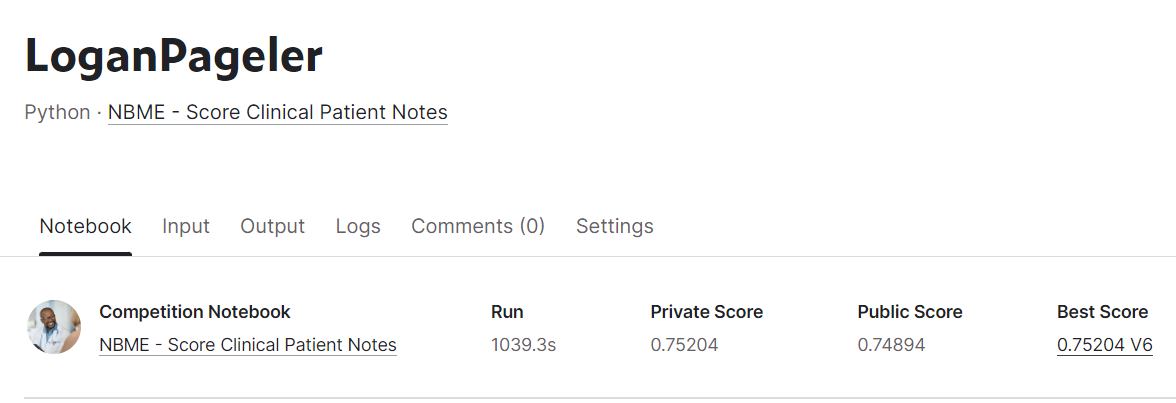